# Social Media Usage Trends


# Imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# Understanding the dataset

In [ ]:
# Reading sample rows

data = pd.read_csv('Social Media Usage India.csv')
data.head()

,Age,City,Current Status,Do you own multiple profiles on Instagram?,Gender,Highest Education,Location (City Airport Code),Phone OS,State,Zone,...,Time Spent on Instagram in last week (in minutes),Time Spent on Instagram in last weekend (in minutes),Time Spent on WhatsApp in last week (in minutes),Time Spent on WhatsApp in last weekend (in minutes),Total Facebook Usage,Total Instagram Usage,Total Social Media Usage,Total Week Usage,Total Weekend Usage,Total WhatsApp Usage
0,24,Delhi,Working professional,No,Female,Graduation,DEL,iOs,Delhi,Northern,...,770,400,900,120,0,"1,170","2,190","1,670",520,"1,020"
1,39,Delhi,Working professional,No,Female,Post graduation,DEL,iOs,Delhi,Northern,...,0,0,"5,000","2,000","8,160",0,"15,160","11,000","4,160","7,000"
2,22,Mumbai,Working professional,No,Male,Graduation,BOM,Android,Maharashtra,Western,...,"1,000","1,000","7,000","2,000","2,500","2,000","13,500","8,500","5,000","9,000"
3,26,Bengaluru,Sabbatical,Yes,Female,Graduation,BLR,Android,Karnataka,Southern,...,"2,000","2,000","1,680","1,680","3,000","4,000","10,360","5,180","5,180","3,360"
4,50,Delhi,Working professional,No,Male,Graduation,DEL,iOs,Delhi,Northern,...,0,0,"2,400","1,300","3,000",0,"6,700","3,900","2,800","3,700"


In [ ]:
# Columns of dataset

print("The columns in the dataset:\n")
data.columns

The columns in the dataset:



Index(['Age', 'City', 'Current Status',
       'Do you own multiple profiles on Instagram?', 'Gender',
       'Highest Education', 'Location (City Airport Code)', 'Phone OS',
       'State', 'Zone',
       'How many followers do you have on Instagram? (In case of multiple accounts, please mention the one with the maximum)',
       'How many posts do you have on Instagram?', 'Latitude', 'Longitude',
       'Time Spent on Facebook in last week (in minutes)',
       'Time Spent on Facebook in last weekend (in minutes)',
       'Time Spent on Instagram in last week (in minutes)',
       'Time Spent on Instagram in last weekend (in minutes)',
       'Time Spent on WhatsApp in last week (in minutes)',
       'Time Spent on WhatsApp in last weekend (in minutes)',
       'Total Facebook Usage', 'Total Instagram Usage',
       'Total Social Media Usage', 'Total Week Usage', 'Total Weekend Usage',
       'Total WhatsApp Usage'],
      dtype='object')

In [ ]:
# Renaming the large column names

data = data.rename(columns={
    'How many followers do you have on Instagram? (In case of multiple accounts, please mention the one with the maximum)':'Instagram Followers',
    'How many posts do you have on Instagram?':'Instagram Posts',
    'Time Spent on Facebook in last week (in minutes)':'Last week Facebook time',
    'Time Spent on Facebook in last weekend (in minutes)':'Last weekend Facebook time',
    'Time Spent on Instagram in last week (in minutes)':'Last week Instaram time',
    'Time Spent on Instagram in last weekend (in minutes)':'Last weekend Instagram time',
    'Time Spent on WhatsApp in last week (in minutes)':'Last week WhatsApp time',
    'Time Spent on WhatsApp in last weekend (in minutes)':'Last weekend WhatsApp time'

})
data.columns

Index(['Age', 'City', 'Current Status',
       'Do you own multiple profiles on Instagram?', 'Gender',
       'Highest Education', 'Location (City Airport Code)', 'Phone OS',
       'State', 'Zone', 'Instagram Followers', 'Instagram Posts', 'Latitude',
       'Longitude', 'Last week Facebook time', 'Last weekend Facebook time',
       'Last week Instaram time', 'Last weekend Instagram time',
       'Last week WhatsApp time', 'Last weekend WhatsApp time',
       'Total Facebook Usage', 'Total Instagram Usage',
       'Total Social Media Usage', 'Total Week Usage', 'Total Weekend Usage',
       'Total WhatsApp Usage'],
      dtype='object')

In [ ]:
# Checking null values, data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1628 entries, 0 to 1627
Data columns (total 26 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Age                                         1628 non-null   int64  
 1   City                                        1628 non-null   object 
 2   Current Status                              1628 non-null   object 
 3   Do you own multiple profiles on Instagram?  1628 non-null   object 
 4   Gender                                      1628 non-null   object 
 5   Highest Education                           1628 non-null   object 
 6   Location (City Airport Code)                1628 non-null   object 
 7   Phone OS                                    1628 non-null   object 
 8   State                                       1628 non-null   object 
 9   Zone                                        1628 non-null   object 
 10  Instagram Fo

In [ ]:
# Size of dataset

num_rows, num_cols = data.shape
print("Dataset has {} rows and {} columns".format(num_rows, num_cols))

Dataset has 1628 rows and 26 columns


In [ ]:
# Sample Row

data.loc[0]

Age                                                             24
City                                                         Delhi
Current Status                                Working professional
Do you own multiple profiles on Instagram?                      No
Gender                                                      Female
Highest Education                                       Graduation
Location (City Airport Code)                                   DEL
Phone OS                                                       iOs
State                                                        Delhi
Zone                                                      Northern
Instagram Followers                                            456
Instagram Posts                                                 20
Latitude                                                 28.651952
Longitude                                                77.231495
Last week Facebook time                                       

In [ ]:
# Distribution of users (latitude, longitude) in dataste

fig = px.scatter_geo(data, lat='Latitude', lon='Longitude',scope='asia')

fig.show()

In [ ]:
# Function to convert object to numeric

def convert_to_num(x):
    x = x.replace(',','')
    return pd.to_numeric(x)

# Hypothesis: Adults from 18 to 30 are the biggest users of social media

In [ ]:
# Splitting data in 3 ranges with respect to age

data_teen = data[(data['Age']>=13)&(data['Age']<=19)]
data_mid_1 = data[(data['Age']>=20)&(data['Age']<=30)]
data_mid_2 = data[(data['Age']>=31)&(data['Age']<=40)]
data_old = data[(data['Age']>=41)]

In [ ]:
# Number of users in each group

print("Users with age 13 to 19:", data_teen['Age'].value_counts().sum())
print("Users with age 20 to 30:", data_mid_1['Age'].value_counts().sum())
print("Users with age 31 to 40:", data_mid_2['Age'].value_counts().sum())
print("Users with 41+:", data_old['Age'].value_counts().sum())

Users with age 13 to 19: 118
Users with age 20 to 30: 1228
Users with age 31 to 40: 127
Users with 41+: 155


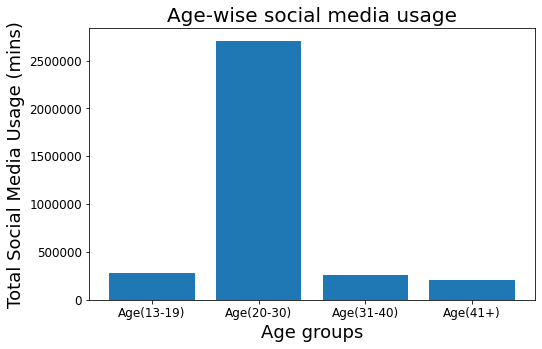

In [ ]:
# Bar plot

plt.figure(figsize=(8,5))
plt.ticklabel_format(style='plain')

plt.bar(['Age(13-19)','Age(20-30)', 'Age(31-40)','Age(41+)'],[data_teen['Total Social Media Usage'].map(convert_to_num).sum(), data_mid_1['Total Social Media Usage'].map(convert_to_num).sum(), data_mid_2['Total Social Media Usage'].map(convert_to_num).sum(), data_old['Total Social Media Usage'].map(convert_to_num).sum()])
plt.xlabel("Age groups",fontsize = 18)
plt.ylabel("Total Social Media Usage (mins)",fontsize = 18)
plt.title("Age-wise social media usage",fontsize = 20)


plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

**Analysis: The hypothesis is true. Highest social media users are of the age group 20 to 30 as seen in the bar plot.**

# Zone-wise social media usage analysis

In [ ]:
# How many zones are present

print("Zone\tNo. of values\n")
data['Zone'].value_counts()

Zone	No. of values



Western          543
Northern         542
Eastern          271
Southern         211
Central           51
North-Eastern     10
Name: Zone, dtype: int64

ZONE WISE SOCIAL MEDIA USAGE



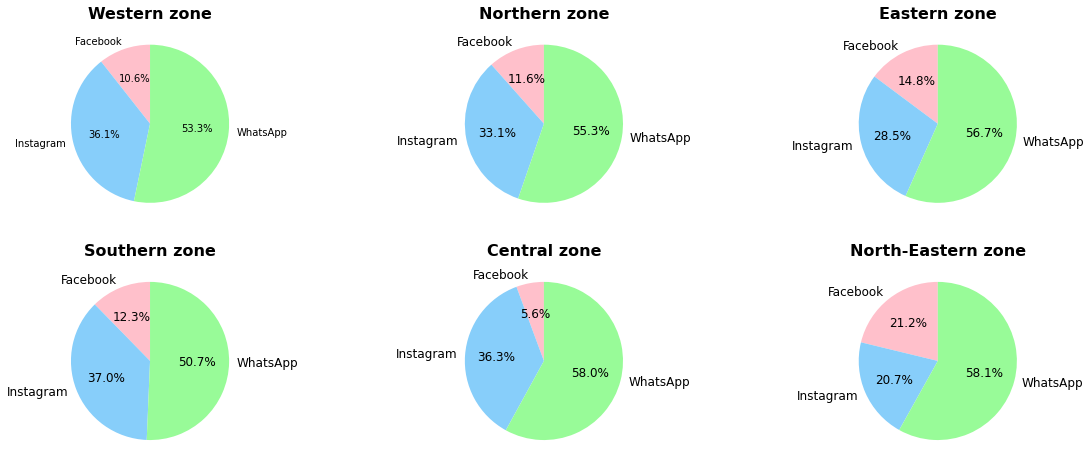

In [ ]:
print("ZONE WISE SOCIAL MEDIA USAGE\n")
plt.figure(figsize=(20,8))

media = ['Facebook','Instagram', 'WhatsApp']
cols = ['pink','lightskyblue','palegreen']

# Western

data_west = data[data['Zone']=='Western']
data_pie = [data_west['Total Facebook Usage'].map(convert_to_num).sum(),
         data_west['Total Instagram Usage'].map(convert_to_num).sum(),
         data_west['Total WhatsApp Usage'].map(convert_to_num).sum()]

plt.subplot(2, 3, 1)

plt.pie(data_pie,
labels =media,
colors = cols,
startangle = 90,
autopct ='%1.1f%%')
plt.title('Western zone', fontsize=16, weight='bold')

# Northern

data_north = data[data['Zone']=='Northern']
data_pie = [data_north['Total Facebook Usage'].map(convert_to_num).sum(),
         data_north['Total Instagram Usage'].map(convert_to_num).sum(),
         data_north['Total WhatsApp Usage'].map(convert_to_num).sum()]

plt.subplot(2, 3, 2)

plt.pie(data_pie, labels =media, colors = cols, startangle = 90, textprops={'fontsize': 12}, autopct ='%1.1f%%')
plt.title('Northern zone', fontsize=16, weight='bold')

# Eastern

data_east = data[data['Zone']=='Eastern']
data_pie = [data_east['Total Facebook Usage'].map(convert_to_num).sum(),
         data_east['Total Instagram Usage'].map(convert_to_num).sum(),
         data_east['Total WhatsApp Usage'].map(convert_to_num).sum()]

plt.subplot(2, 3, 3)

plt.pie(data_pie, labels =media, colors = cols, startangle = 90, textprops={'fontsize': 12}, autopct ='%1.1f%%') 
plt.title('Eastern zone', fontsize=16, weight='bold')

# Southern

data_east = data[data['Zone']=='Southern']
data_pie = [data_east['Total Facebook Usage'].map(convert_to_num).sum(),
         data_east['Total Instagram Usage'].map(convert_to_num).sum(),
         data_east['Total WhatsApp Usage'].map(convert_to_num).sum()]

plt.subplot(2, 3, 4)

plt.pie(data_pie, labels =media, colors = cols, startangle = 90, textprops={'fontsize': 12}, autopct ='%1.1f%%')
plt.title('Southern zone', fontsize=16, weight='bold')

# Central

data_center = data[data['Zone']=='Central']
data_pie = [data_center['Total Facebook Usage'].map(convert_to_num).sum(),
         data_center['Total Instagram Usage'].map(convert_to_num).sum(),
         data_center['Total WhatsApp Usage'].map(convert_to_num).sum()]

plt.subplot(2, 3, 5)

plt.pie(data_pie, labels =media, colors = cols, startangle = 90, textprops={'fontsize': 12}, autopct ='%1.1f%%')
plt.title('Central zone', fontsize=16, weight='bold')

# North-Eastern

data_ne = data[data['Zone']=='North-Eastern']
data_pie = [data_ne['Total Facebook Usage'].map(convert_to_num).sum(),
         data_ne['Total Instagram Usage'].map(convert_to_num).sum(),
         data_ne['Total WhatsApp Usage'].map(convert_to_num).sum()]

plt.subplot(2, 3, 6)

plt.pie(data_pie, labels =media, colors = cols, startangle = 90, textprops={'fontsize': 12}, autopct ='%1.1f%%')
plt.title('North-Eastern zone', fontsize=16, weight='bold')

plt.show()

**Analysis: The usage of WhatsApp is maximum in every zone. In general, Instagram is used more than Facebook. The usage of Facebook and Instagram is comparable in the North-Eastern zone.**

# Question: Which gender uses more social media: Male or female?

In [ ]:
data['Gender'].value_counts()

Female        813
Male          813
Non Binary      2
Name: Gender, dtype: int64

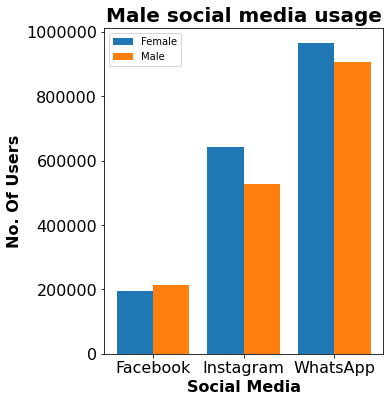

In [ ]:
plt.figure(figsize=(5,6))
plt.ticklabel_format(style='plain')
media = ['Facebook', 'Instagram', 'WhatsApp']
X_axis = np.arange(len(media))

data_female = data[data['Gender']=='Female']
plt.bar(X_axis-0.2,
        [data_female['Total Facebook Usage'].map(convert_to_num).sum(),
         data_female['Total Instagram Usage'].map(convert_to_num).sum(),
         data_female['Total WhatsApp Usage'].map(convert_to_num).sum()],
        width=0.4,
       label="Female")

data_male = data[data['Gender']=='Male']
plt.bar(X_axis+0.2,
        [data_male['Total Facebook Usage'].map(convert_to_num).sum(),
         data_male['Total Instagram Usage'].map(convert_to_num).sum(),
         data_male['Total WhatsApp Usage'].map(convert_to_num).sum()],
        width=0.4,
label="Male")


plt.xticks(X_axis, media, fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Social Media', fontsize=16, weight='bold')
plt.ylabel('No. Of Users', fontsize=16, weight='bold')
plt.title('Male social media usage', fontsize=20, weight='bold')
plt.legend()

plt.show()

**Analyis: It can be concluded that females have slightly more social media usage than males.**

# Hypothesis: Females have more Instagram followers than males

In [ ]:
# Considering the complete data
data_c = data[['Age', 'City', 'Current Status',
       'Do you own multiple profiles on Instagram?', 'Gender',
       'Highest Education', 'Location (City Airport Code)', 'Phone OS',
       'State', 'Zone','Instagram Followers','Total Facebook Usage', 'Total Instagram Usage', 'Total Social Media Usage']]
data_c['Total Facebook Usage'] = data_c['Total Facebook Usage'].map(convert_to_num)
data_c['Total Instagram Usage'] = data_c['Total Instagram Usage'].map(convert_to_num)
data_c['Instagram Followers'] = data_c['Instagram Followers'].map(convert_to_num)
data_c['Total Social Media Usage'] = data_c['Total Social Media Usage'].map(convert_to_num)

In [ ]:
followersByGender = data_c.groupby('Gender')['Instagram Followers'].mean()
followersByGender

Gender
Female        1059.966790
Male           662.606396
Non Binary    6446.000000
Name: Instagram Followers, dtype: float64

**Analysis: The hypothesis is true. Female Instagram users have more followers than Male users.**

# Question: Does Facebook and Instagram usage relate to Instagram followers?

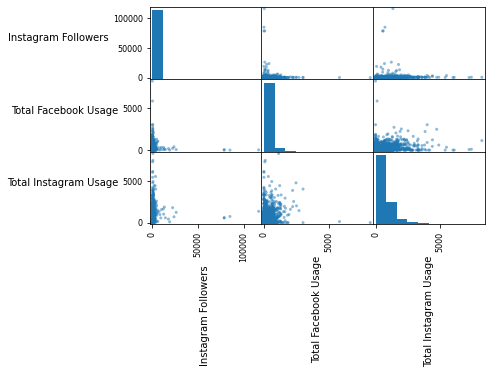

In [ ]:
axes = pd.plotting.scatter_matrix(data_c[['Instagram Followers','Total Facebook Usage', 'Total Instagram Usage']])
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

In [ ]:
data_c[['Instagram Followers','Total Facebook Usage', 'Total Instagram Usage']].corr()

,Instagram Followers,Total Facebook Usage,Total Instagram Usage
Instagram Followers,1.000000,-0.029036,0.055666
Total Facebook Usage,-0.029036,1.000000,0.162187
Total Instagram Usage,0.055666,0.162187,1.000000


**Analysis: We can see from the Correlation Matrix that number of Instagram Followers are negatively correlated with Facebook Usage. Hence, more the number of Instagram Followers people get, the less they visit Facebook. More Instagram Followers leads to more Instagram Usage and vice-versa.**

# Hypothesis: Working professionals use less social media

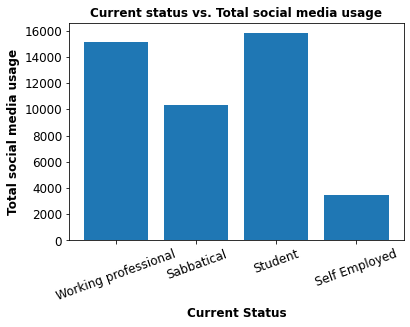

In [ ]:
plt.bar(data_c['Current Status'],data_c['Total Social Media Usage'])
plt.xticks(rotation=20, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Current Status", fontsize=12, weight='bold')
plt.ylabel("Total social media usage", fontsize=12, weight='bold')
plt.title("Current status vs. Total social media usage", weight='bold', fontsize=12)
plt.show()

**Analysis: The hyposthesis that working professionals use less social media is false. The usage of social media is maximum in case of students. It is observed that self employed people use least social media.**

# Hyposthesis: Working professionals tend to use social media more during weekends

In [ ]:
# Filtering data for Working professionals

data_c = data[data['Current Status']=='Working professional']
data_c = data[['Total Week Usage','Total Weekend Usage']].applymap(convert_to_num)

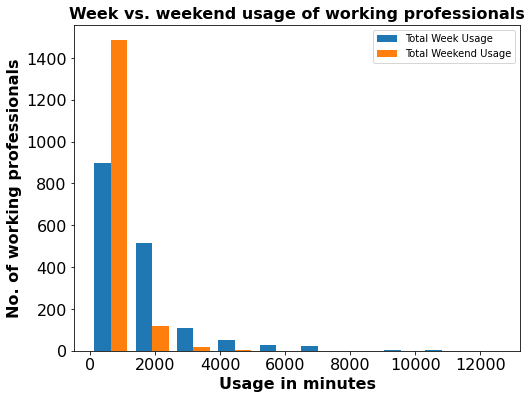

In [ ]:
plt.figure(figsize=(8,6))
plt.hist([data_c['Total Week Usage'], data_c['Total Weekend Usage']],
         label=['Total Week Usage','Total Weekend Usage'])
plt.legend(loc='upper right')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Usage in minutes", fontsize=16, weight='bold')
plt.ylabel("No. of working professionals", fontsize=16, weight='bold')
plt.title('Week vs. weekend usage of working professionals', fontsize=16, weight='bold')
plt.show()

**Analysis: The hypothesis is true. Weekend Usage is more than weekly usage forworking professionals. A pssible reason could be that they have free time during weekends.**

# Hyposthesis: People with more degrees tend to have less social media usage

In [ ]:
# Considering the complete dataset

data_c = data[['Age', 'City', 'Current Status',
       'Do you own multiple profiles on Instagram?', 'Gender',
       'Highest Education', 'Location (City Airport Code)', 'Phone OS',
       'State', 'Zone','Instagram Followers','Total Facebook Usage', 'Total Instagram Usage', 'Total Social Media Usage']]
data_c['Total Facebook Usage'] = data_c['Total Facebook Usage'].map(convert_to_num)
data_c['Total Instagram Usage'] = data_c['Total Instagram Usage'].map(convert_to_num)
data_c['Instagram Followers'] = data_c['Instagram Followers'].map(convert_to_num)
data_c['Total Social Media Usage'] = data_c['Total Social Media Usage'].map(convert_to_num)

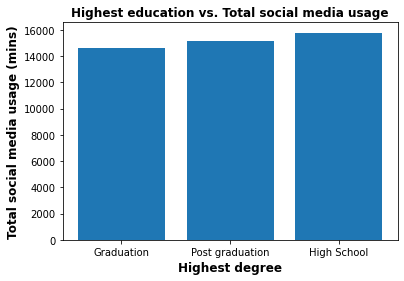

In [ ]:
plt.bar(data_c['Highest Education'],data_c['Total Social Media Usage'])
plt.xlabel("Highest degree", fontsize=12, weight='bold')
plt.ylabel('Total social media usage (mins)', fontsize=12, weight='bold')
plt.title("Highest education vs. Total social media usage", fontsize=12, weight='bold')
plt.show()

**Analysis: It is not true that people with higher degrees tend to use social media less. In fact, people with post graduation degree have more usage than people with graduation degree.**

# Question: Is Instagram bring used more than Facebook?

In [ ]:
# Difference between Instagram usage and Facebook usage
data_c['Insta-FB'] = data_c['Total Instagram Usage'] - data_c['Total Facebook Usage']

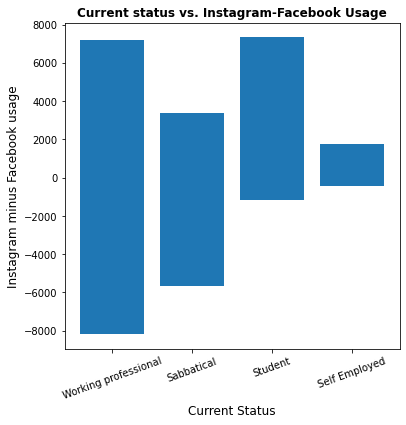

In [ ]:
# Positive values => more Instagram usage

plt.figure(figsize=(6,6))
plt.bar(data_c['Current Status'],data_c['Insta-FB'])
plt.xticks(rotation=20)
plt.xlabel("Current Status", fontsize=12)
plt.ylabel("Instagram minus Facebook usage", fontsize=12)
plt.title("Current status vs. Instagram-Facebook Usage", weight='bold', fontsize=12)

plt.show()

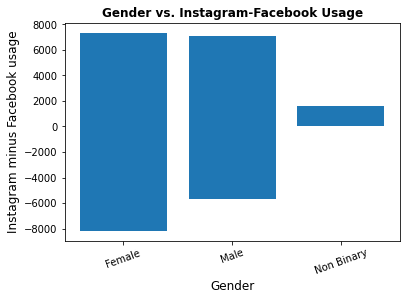

In [ ]:
# Positive values => more Instagram usage

plt.bar(data_c['Gender'],data_c['Insta-FB'])
plt.xticks(rotation=20)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Instagram minus Facebook usage", fontsize=12)
plt.title("Gender vs. Instagram-Facebook Usage", weight='bold', fontsize=12)

plt.show()

**Analysis: Working professionals and people with Sabbatical use as much Instagram as they use facebook. Students and self employed people use Instagram more than Facebook. Gender-wise analysis shows that Instagram and Facebook both are equally used.**

# Hypothesis: People living in Metropolitan cities have more Instagram followers

In [ ]:
# Set of cities in dataset
set(data_c['City'])

{'Agra',
 'Ahmedabad',
 'Allahabad',
 'Amritsar',
 'Aurangabad',
 'Bagdogra',
 'Baroda',
 'Belgaum',
 'Bengaluru',
 'Bhavnagar',
 'Bhopal',
 'Bhubaneshwar',
 'Bhuj',
 'Chandigarh',
 'Chennai',
 'Coimbatore',
 'Cooch-behar',
 'DehraDun',
 'Delhi',
 'Dibrugarh',
 'Durgapur',
 'Goa',
 'Guwahati',
 'Gwalior',
 'Hyderabad',
 'Indore',
 'Jaipur',
 'Jammu',
 'Jorhat',
 'Kandla',
 'Kanpur',
 'Kochi',
 'Kolkata',
 'Kulu',
 'Lucknow',
 'Ludhiana',
 'Madurai',
 'Mangalore',
 'Mumbai',
 'Nagpur',
 'Nainital',
 'Pathankot',
 'Patna',
 'Pune',
 'Raipur',
 'Rajkot',
 'Ranchi',
 'Surat',
 'Thiruvananthapuram',
 'Tiruchirappalli',
 'Udaipur',
 'Varanasi',
 'Vishakhapatnam'}

In [ ]:
# Assigning each city 0 if not metropolitan and 1 if metropolitan
# Reference: https://en.wikipedia.org/wiki/List_of_metropolitan_areas_in_India

metro_city_dict = {'Agra':0,
 'Ahmedabad':1,
 'Allahabad':0,
 'Amritsar':0,
 'Aurangabad':0,
 'Bagdogra':0,
 'Baroda':0,
 'Belgaum':0,
 'Bengaluru':1,
 'Bhavnagar':0,
 'Bhopal':0,
 'Bhubaneshwar':0,
 'Bhuj':0,
 'Chandigarh':0,
 'Chennai':1,
 'Coimbatore':0,
 'Cooch-behar':0,
 'DehraDun':0,
 'Delhi':1,
 'Dibrugarh':0,
 'Durgapur':0,
 'Goa':0,
 'Guwahati':0,
 'Gwalior':0,
 'Hyderabad':1,
 'Indore':0,
 'Jaipur':1,
 'Jammu':0,
 'Jorhat':0,
 'Kandla':0,
 'Kanpur':1,
 'Kochi':0,
 'Kolkata':1,
 'Kulu':0,
 'Lucknow':0,
 'Ludhiana':0,
 'Madurai':1,
 'Mangalore':0,
 'Mumbai':1,
 'Nagpur':1,
 'Nainital':0,
 'Pathankot':0,
 'Patna':1,
 'Pune':1,
 'Raipur':0,
 'Rajkot':0,
 'Ranchi':0,
 'Surat':1,
 'Thiruvananthapuram':0,
 'Tiruchirappalli':0,
 'Udaipur':0,
 'Varanasi':0,
 'Vishakhapatnam':1}

data_c['Metropolitan'] = data['City'].map(metro_city_dict)
data_c['Metropolitan']

0       1
1       1
2       1
3       1
4       1
       ..
1623    1
1624    1
1625    0
1626    1
1627    1
Name: Metropolitan, Length: 1628, dtype: int64

In [ ]:
# Considering the complete data
data_c = data[['Age', 'City', 'Current Status',
       'Do you own multiple profiles on Instagram?', 'Gender',
       'Highest Education', 'Location (City Airport Code)', 'Phone OS',
       'State', 'Zone','Instagram Followers','Total Facebook Usage', 'Total Instagram Usage', 'Total Social Media Usage']]
data_c['Total Facebook Usage'] = data_c['Total Facebook Usage'].map(convert_to_num)
data_c['Total Instagram Usage'] = data_c['Total Instagram Usage'].map(convert_to_num)
data_c['Instagram Followers'] = data_c['Instagram Followers'].map(convert_to_num)
data_c['Total Social Media Usage'] = data_c['Total Social Media Usage'].map(convert_to_num)
data_c.head()

,Age,City,Current Status,Do you own multiple profiles on Instagram?,Gender,Highest Education,Location (City Airport Code),Phone OS,State,Zone,Instagram Followers,Total Facebook Usage,Total Instagram Usage,Total Social Media Usage
0,24,Delhi,Working professional,No,Female,Graduation,DEL,iOs,Delhi,Northern,456,0,1170,2190.0
1,39,Delhi,Working professional,No,Female,Post graduation,DEL,iOs,Delhi,Northern,0,8160,0,15160.0
2,22,Mumbai,Working professional,No,Male,Graduation,BOM,Android,Maharashtra,Western,400,2500,2000,13500.0
3,26,Bengaluru,Sabbatical,Yes,Female,Graduation,BLR,Android,Karnataka,Southern,485,3000,4000,10360.0
4,50,Delhi,Working professional,No,Male,Graduation,DEL,iOs,Delhi,Northern,0,3000,0,6700.0


In [ ]:
# For each city, assign 0 and 1 for new column 'Metropolitan'

data_c['Metropolitan'] = data['City'].map(metro_city_dict)
data_c.head()

,Age,City,Current Status,Do you own multiple profiles on Instagram?,Gender,Highest Education,Location (City Airport Code),Phone OS,State,Zone,Instagram Followers,Total Facebook Usage,Total Instagram Usage,Total Social Media Usage,Metropolitan
0,24,Delhi,Working professional,No,Female,Graduation,DEL,iOs,Delhi,Northern,456,0,1170,2190.0,1
1,39,Delhi,Working professional,No,Female,Post graduation,DEL,iOs,Delhi,Northern,0,8160,0,15160.0,1
2,22,Mumbai,Working professional,No,Male,Graduation,BOM,Android,Maharashtra,Western,400,2500,2000,13500.0,1
3,26,Bengaluru,Sabbatical,Yes,Female,Graduation,BLR,Android,Karnataka,Southern,485,3000,4000,10360.0,1
4,50,Delhi,Working professional,No,Male,Graduation,DEL,iOs,Delhi,Northern,0,3000,0,6700.0,1


In [ ]:
# Mean instagram followers for each city
followersByCity = data_c.groupby('City')['Instagram Followers'].mean()
followersByCityDf = pd.DataFrame(followersByCity)

# New column for 'Metropolitan' or not
followersByCityDf['Metropolitan'] = followersByCityDf.index.map(metro_city_dict)

followersByCityDf

,Instagram Followers,Metropolitan
City,,
Agra,446.333333,0
Ahmedabad,670.412844,1
Allahabad,936.000000,0
Amritsar,542.800000,0
Aurangabad,834.000000,0
Bagdogra,261.105263,0
Baroda,462.043478,0
Belgaum,1117.000000,0
Bengaluru,675.057471,1


In [ ]:
# Grouping by 'Metropolitan'

followersByCityDf.groupby('Metropolitan')['Instagram Followers'].mean()

Metropolitan
0    847.248510
1    804.704077
Name: Instagram Followers, dtype: float64

In [ ]:
# Top 10 cities with most Instagram followers

followersByCityMean = data_c.groupby('City')['Instagram Followers'].mean()
followersByCityMean = followersByCityMean.sort_values(ascending=False)
followersByCityMean[:10]

City
Bhubaneshwar    12627.000000
Surat            3812.388889
Chandigarh       1515.064516
Belgaum          1117.000000
Bhopal           1051.000000
Goa               977.000000
Allahabad         936.000000
Kulu              930.000000
Kolkata           917.419192
Mumbai            853.180000
Name: Instagram Followers, dtype: float64

**Analysis: We see that the Hypothesis is not true. Everyone can gather followers by talent irrespective of where they belong.**